In [76]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')



In [77]:
#Load the data and infer the date format for the date features

df = pd.read_csv('BikeSales-Dusty2.csv', 
                  parse_dates=['First_Seen','Last_Seen','Last_Modified'], 
                  infer_datetime_format=True)



In [78]:
df.head()

,ABS,Adjustable_Seat,Bike,Body,Bore,Cam_Type,Carburettor,Carburettor(s),Charging_Method,Clutch_Type,...,Valves_Per_Cylinder,Warranty_KMs,Warranty_in_Months_from_First_Registration,Wet_Operational_Weight,Wheel_Type,Wheelbase,Width,Windscreen,Release_Year,Seller
0,No,No,Kuda Pro 250,Adventure Touring,62.000,SOHC (Single Over Head Cam),NaN,1.0,Alternator & Regulator-Rectifier,Multi plate,...,4.0,No,3,150.0,Other,1480.0,860.000,Standard,2009,Private
1,No,No,250 R Road Manual 5sp 250cc (Discontinued),Super Sport,77.000,SOHC (Single Over Head Cam),NaN,1.0,Engine,Multi plate,...,4.0,No,0,136.0,9-Spoke,1350.0,818.262,Standard,2013,Private
2,No,No,GN250 (Jan),Naked,72.000,SOHC (Single Over Head Cam),NaN,1.0,Engine,NaN,...,4.0,No,0,141.0,NaN,1504.0,818.500,Standard,1991,Private
3,No,No,GSX1100 ESD Road Manual 5sp 1100cc (Half fairing),Sport Touring,74.319,DOHC (Double Over Head Cam),Constant velocity,4.0,Engine,NaN,...,4.0,No,0,254.0,NaN,1439.0,769.659,Standard,1984,Private
4,No,No,TS250 Trail Manual 5sp 250cc,Trail,81.500,Reed Valve,NaN,1.0,Engine,NaN,...,4.0,No,0,141.0,NaN,1400.0,818.262,Standard,1976,Private


In [79]:
#######################################################################
### DELETE CELL WHEN MACHINE LEARNING IMPUTATION HAS BEEN COMPLETED ###
#######################################################################

# The EDA notebook will eventually perform machine learning on these features to impute the missing values.
# Just so there isn't any issues with the data for feature engineering, i'l be using the most common value.

df['Body'][df['Body'].isnull() == True] = df['Body'].mode()[0]
df['Carburettor'][df['Carburettor'].isnull() == True] = df['Carburettor'].mode()[0]
df['Clutch_Type'][df['Clutch_Type'].isnull() == True] = df['Clutch_Type'].mode()[0]
df['Country_of_Origin'][df['Country_of_Origin'].isnull() == True] = df['Country_of_Origin'].mode()[0]
df['Drive_Type'][df['Drive_Type'].isnull() == True] = df['Drive_Type'].mode()[0]
df['Frame_Material'][df['Frame_Material'].isnull() == True] = df['Frame_Material'].mode()[0]
df['Front_Brake_Description'][df['Front_Brake_Description'].isnull() == True] = df['Front_Brake_Description'].mode()[0]
df['Front_Suspension'][df['Front_Suspension'].isnull() == True] = df['Front_Suspension'].mode()[0]
df['Rear_Brake_Description'][df['Rear_Brake_Description'].isnull() == True] = df['Rear_Brake_Description'].mode()[0]
df['Rear_Suspension'][df['Rear_Suspension'].isnull() == True] = df['Rear_Suspension'].mode()[0]
df['Wheel_Type'][df['Wheel_Type'].isnull() == True] = df['Wheel_Type'].mode()[0]

df['Kilometers'][df['Kilometers'].isnull() == True] = df['Kilometers'].mean()



## Brand
This is the manufacturer of the vehicle and is the same as the Make of the bike. This is a common way to distinguish between bike at the simplest level. 


In [140]:
# Features to extract from the data
# Brand, model, Age, 
df['Brand'] = df['URL'].str.split('/').str[5].str.split('-').str[1].str.capitalize()

# Replace known names with more than one word, like Harley Davidson
df['Brand'][df['Brand'] == 'Harley'] = 'Harley Davidson'
df['Brand'][df['Brand'] == 'Mv'] = 'MV Agusta'
df['Brand'][df['Brand'] == 'Royal'] = 'Royal Enfield'
df['Brand'][df['Brand'] == 'Moto'] = 'Moto Guzzi'
df['Brand'][df['Brand'] == 'Can'] = 'Can Am'




## Model
This describes the Brand of the bike in more detail, providing a slightly more complex discription. 

In [153]:
df['Model'] = df['URL'].str.split('/').str[5].str.split('-').str[2:].str.join(' ').str.capitalize()

# Need to deal with the models that have two word, like Harley Davidson
df['Model'][df['Model'].str.contains('Davidson') == True].str.split().str[1:].str.join(' ')
df['Model'][df['Model'].str.contains('Agusta') == True].str.split().str[1:].str.join(' ')
df['Model'][df['Model'].str.contains('Enfield') == True].str.split().str[1:].str.join(' ')
df['Model'][df['Model'].str.contains('Guzzi') == True].str.split().str[1:].str.join(' ')
df['Model'][df['Model'].str.contains('Am') == True].str.split().str[1:].str.join(' ');


## Age
Any asset decreasing in value with age. We can deterime the age using todays date and the release year.

In [154]:
df['Age'] = datetime.now().year - df['Release_Year']

In [172]:
# 20 most popular brands
top_20Brands = df['Brand'].value_counts()[:20].index

subset = df[df['Brand'].isin(top_20Brands)]

(20010, 94)

In [178]:
features = ['Body','Brand','Model','Engine_Description','Kilometers','Suburb','Age','Price']
subset[features].head()

,Body,Brand,Model,Engine_Description,Kilometers,Suburb,Age,Price
2,Naked,Suzuki,Gn250,250.0,84000.0,Drummoyne,28,500.0
3,Sport Touring,Suzuki,Gsx1100 esd,1100.0,23504.0,Carnarvon,35,500.0
4,Trail,Suzuki,Ts250,250.0,20724.0,Upper turon,43,500.0
6,Naked,Honda,Cb125e,125.0,3808.0,Willoughby,5,555.0
8,Super Sport,Honda,Cbr900rr fireblade 929,929.0,81276.0,Wolumla,19,600.0


In [179]:
subset[features].describe()

,Engine_Description,Kilometers,Age,Price
count,20010.000000,2.001000e+04,20010.000000,20010.000000
mean,829.445677,8.074344e+04,7.172614,11315.208346
std,488.723668,7.069682e+06,7.686456,8573.452693
min,50.000000,0.000000e+00,0.000000,1.000000
25%,450.000000,4.500000e+03,2.000000,5300.000000
50%,790.000000,1.768100e+04,5.000000,8790.000000
75%,1200.000000,5.006350e+04,10.000000,15000.000000
max,2300.000000,1.000000e+09,81.000000,125012.000000


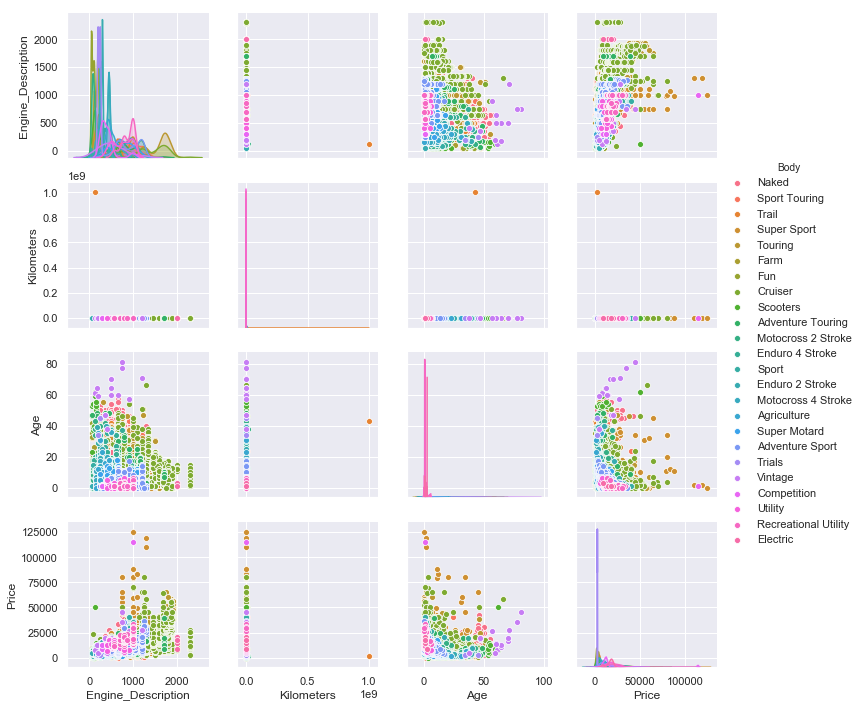

In [190]:
sns.pairplot(subset[features],hue='Body')

In [173]:
df.columns

Index(['ABS', 'Adjustable_Seat', 'Bike', 'Body', 'Bore', 'Cam_Type',
       'Carburettor', 'Carburettor(s)', 'Charging_Method', 'Clutch_Type',
       'Colour', 'Compression_Ratio', 'Cooling', 'Country_of_Origin',
       'Cylinders', 'Description', 'Drive_Type', 'Dry_Weight', 'Engine_Config',
       'Engine_Description', 'Engine_Immobiliser', 'Engine_Stroke',
       'Engine_Type', 'Engine_Voltage', 'Exhaust_Config', 'First_Seen',
       'Frame_Material', 'Front_Brake_Caliper(s)', 'Front_Brake_Description',
       'Front_Brake_Diameter', 'Front_Suspension', 'Front_Suspension_Travel',
       'Fuel_Reserve_Capacity', 'Fuel_Tank_Capacity', 'Fuel_Type',
       'Gear_Change_Method', 'Gear_Number', 'Gear_Type', 'Ground_Clearance',
       'Height', 'Ignition', 'Induction_System', 'Kilometers', 'Last_Modified',
       'Last_Seen', 'Learner_Approved', 'Length', 'Linked_Braking_System',
       'Lock_Type', 'Maximum_Power', 'Maximum_Power_RPM', 'Maximum_Torque',
       'Maximum_Torque_RPM', 'Networ

In [191]:
#sum(df['Body'].value_counts()[:10])/df.shape[0]
df['Body'].value_counts()

Cruiser                 4917
Naked                   4060
Super Sport             3133
Sport Touring           1396
Touring                 1032
Enduro 4 Stroke         1020
Adventure Touring       1014
Scooters                 866
Motocross 4 Stroke       789
Adventure Sport          719
Fun                      579
Motocross 2 Stroke       340
Agriculture              327
Trail                    288
Enduro 2 Stroke          265
Utility                  192
Super Motard             129
Sport                     95
Recreational Utility      93
Farm                      46
Vintage                   37
Competition               16
Electric Bikes            13
Trials                    12
Electric Scooters         12
Electric                   6
Name: Body, dtype: int64

In [ ]:
#df.to_csv('BikeSales-Modelling.csv',index=False)